In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing heartstrok CSV file
ds_heart=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
ds_heart.shape

(5110, 12)

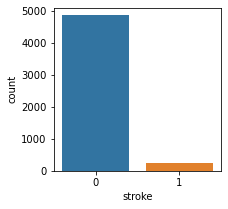

In [4]:
#check to perform to see if we have balanced dataset or not
plt.figure(figsize=(3,3))
sns.countplot(x=ds_heart.stroke,data=ds_heart)
plt.show()

>Above data is imablanced as we have less data of heart stroke persons

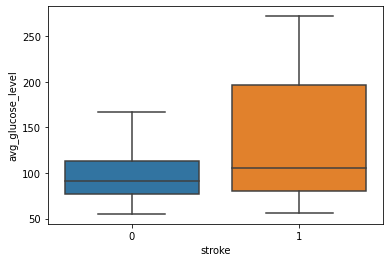

In [5]:
sns.boxplot(x="stroke",y="avg_glucose_level",data=ds_heart,showfliers=False)
plt.show()

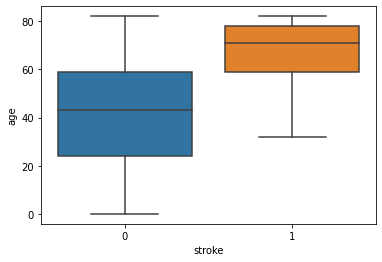

In [6]:
ds_heart_clean=ds_heart.drop("id",axis=1)
sns.boxplot(x="stroke",y="age",data=ds_heart_clean,showfliers=False)

In [7]:
ds_heart_clean.hypertension.value_counts() ,ds_heart_clean.heart_disease.value_counts()

(0    4612
 1     498
 Name: hypertension, dtype: int64,
 0    4834
 1     276
 Name: heart_disease, dtype: int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


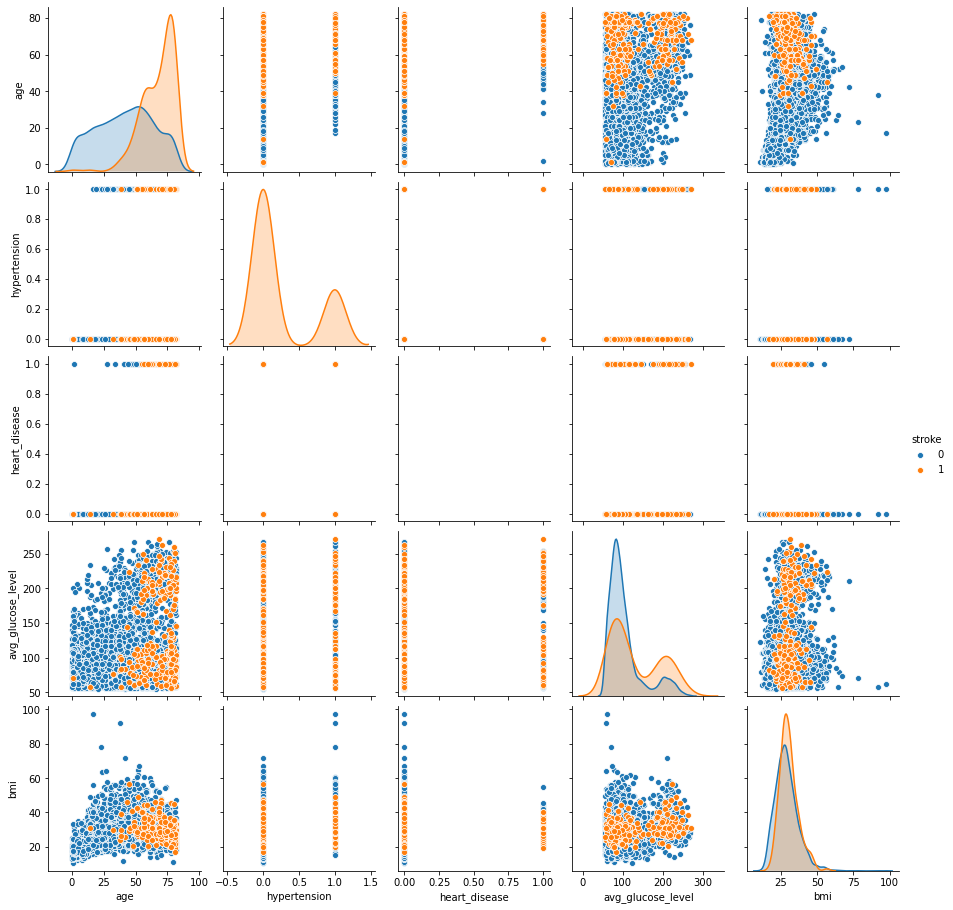

In [8]:
sns.pairplot(data=ds_heart_clean,hue="stroke")

In [9]:
ds_heart_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#checking distinct values in gender
ds_heart_clean.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
#substitute gender values to numeric values using map
ds_heart_clean.gender=ds_heart_clean.gender.map({"Male":int(1),"Female":int(0),"Other":int(2)})

In [12]:
#checking distinct values in ever_married
ds_heart_clean.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [13]:
#substitute ever_married values to numeric values using map
ds_heart_clean.ever_married=ds_heart_clean.ever_married.map({"Yes":int(1),"No":int(0)})

In [14]:
# applying one hot encoding to worktype
work_type_labels=pd.get_dummies(ds_heart_clean["work_type"])

In [15]:
#checking distinct values in Residence_type
ds_heart_clean.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [16]:
#substitute Residence_type values to numeric values using map
ds_heart_clean.Residence_type=ds_heart_clean.Residence_type.map({"Urban":int(1),"Rural":int(0)})

In [17]:
# check null values in avg_glucose and bmi 
ds_heart_clean.avg_glucose_level.isnull().values.sum() , ds_heart_clean.bmi.isnull().values.sum()

(0, 201)

In [18]:
#checking distinct values in smoking_status
ds_heart_clean.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [19]:
# applying one hot encoding to worktype
smoking_status_labels=pd.get_dummies(ds_heart_clean["smoking_status"])

In [20]:
#substiuting null values to with feature median value
ds_heart_clean["bmi"]=ds_heart_clean["bmi"].fillna(ds_heart_clean["bmi"].median())

In [21]:
#performing scaling on avgglucose and bmi
from sklearn.preprocessing import MinMaxScaler
minmax_transform=MinMaxScaler()
ds_heart_clean[["avg_glucose_level","bmi"]]=minmax_transform.fit_transform(ds_heart_clean[["avg_glucose_level","bmi"]])


In [22]:
ds_heart_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,0.801265,0.301260,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,0.679023,0.203895,never smoked,1
2,1,80.0,0,1,1,Private,0,0.234512,0.254296,never smoked,1
3,0,49.0,0,0,1,Private,1,0.536008,0.276060,smokes,1
4,0,79.0,1,0,1,Self-employed,0,0.549349,0.156930,never smoked,1


In [23]:
#concat onehotencoding lables of worktype and smoking status
ds_heart_clean=pd.concat([ds_heart_clean,work_type_labels,smoking_status_labels],axis=1)


#dropping orginal worktype and smoking status
ds_heart_clean.drop(["work_type","smoking_status"],axis=1,inplace=True)

In [24]:
#function for generating confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


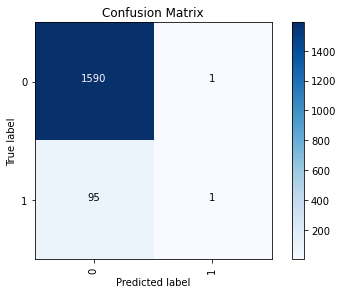

In [28]:
#performing model on imbalanced dataset
# importing sklearn libraries for split,model and perormance measeures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

#separating features and dependent varaiable
X_data=ds_heart_clean.drop("stroke",axis=1)
Y_data=ds_heart_clean["stroke"]
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.33,random_state=42)

#applying Logistic regression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

#predicting the target varaiable
y_pred=log_reg.predict(X_test)


#generating confusion matrix
cfm=confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(cfm,[0,1],normalize=False,title="Confusion Matrix")

In [29]:
#performing upsampling with SMOTE
from imblearn.over_sampling import SMOTE

#passing the Data to upsample the hearstrok persons data
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(X_data,Y_data)

#splitting the train and test data
X_train,X_test,Y_train,Y_test=train_test_split(x_sm,y_sm,test_size=0.33,random_state=42)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81575311        nan 0.86166129        nan 0.86903117        nan
 0.86749578        nan 0.86872409        nan 0.86841701        nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


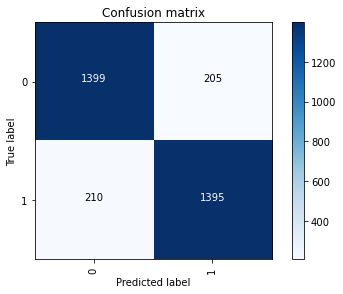

In [32]:
#import GridsearcCV for hyperparamter tunning
from sklearn.model_selection import GridSearchCV
log_reg=LogisticRegression()

#providing algoritham specific paramters
params={"penalty":['l2','l1'],'C':[0.01, 0.1, 1, 10, 20, 30]}

#passing algotitham and hyperparamters for getting best paramters
log_reg_grid=GridSearchCV(log_reg,cv=3,param_grid=params,verbose=2,n_jobs=-1)

#fitting the model
log_reg_grid.fit(X_train,Y_train)

# predicting the model
y_pred=log_reg_grid.predict(X_test)

#generating the confusion matrix
cm=confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(cm,[0,1],normalize=False)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


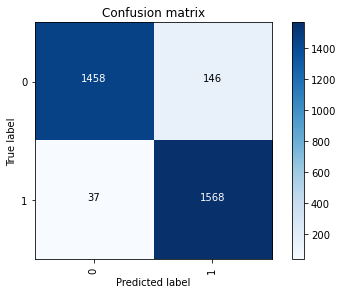

In [33]:
#importing ensemble model Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#providing algoritham specific paramters
params=params={'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}

#passing algotitham and hyperparamters for getting best paramters
rfc_grid=GridSearchCV(rfc,param_grid=params,verbose=2,n_jobs=-1)

#fitting the model
rfc_grid.fit(X_train,Y_train)

#predicting the target variable
y_pred_rfc=rfc_grid.predict(X_test)

#generating confusion matrix
cfm_rf=confusion_matrix(Y_test,y_pred_rfc)
plot_confusion_matrix(cfm_rf,[1,0],normalize=False)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[[1444  160]
 [  41 1564]]


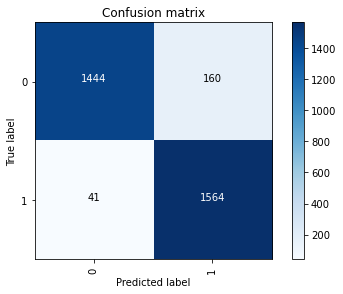

In [42]:
#importing ensemble model Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#providing algoritham specific paramters
params=params={'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}

#passing algotitham and hyperparamters for getting best paramters
rfc_grid=GridSearchCV(rfc,param_grid=params,verbose=2,n_jobs=-1)

#fitting the model
rfc_grid.fit(X_train,Y_train)

#predicting the target variable
y_pred_rfc=rfc_grid.predict(X_test)

#generating confusion matrix
cfm_rf=confusion_matrix(Y_test,y_pred_rfc)
print(cfm_rf)
plot_confusion_matrix(cfm_rf,[0,1],normalize=False)

In [35]:
print("{}".format(classification_report(Y_test,y_pred_rfc)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1604
           1       0.91      0.98      0.94      1605

    accuracy                           0.94      3209
   macro avg       0.94      0.94      0.94      3209
weighted avg       0.94      0.94      0.94      3209



In [36]:
#generating probability scores
y_prob_logr=log_reg_grid.predict_proba(X_test)
y_prob_rfc=rfc_grid.predict_proba(X_test)

#passing prob  to get AUC score
logr_auc = roc_auc_score(Y_test,y_prob_logr[:,1])
rfc_auc = roc_auc_score(Y_test,y_prob_rfc[:,1])

## Calculate ROC curve

In [37]:
logr_fpr, logr_tpr, _ = roc_curve(Y_test, y_prob_logr[:,1])
rfc_fpr, rfc_tpr, _ = roc_curve(Y_test, y_prob_rfc[:,1])

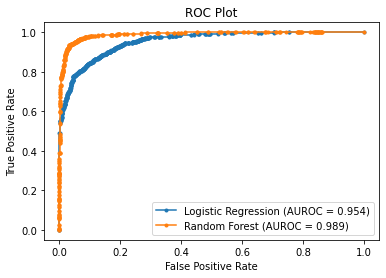

In [38]:
plt.plot(logr_fpr, logr_tpr, marker=".", label='Logistic Regression (AUROC = %0.3f)' % logr_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rfc_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()